In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from windrose import WindroseAxes




In [2]:
import os
print(os.getcwd())

d:\EAD\notebooks


In [3]:
data = pd.read_csv(r"D:\EAD\data\benin-malanville.csv")
data.head

<bound method NDFrame.head of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        W

In [4]:
data.describe

<bound method NDFrame.describe of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

     

In [5]:
mean = data.mean(numeric_only=True)  # Mean for numeric columns
median = data.median(numeric_only=True)  # Median for numeric columns
std = data.std(numeric_only=True)  # Standard deviation for numeric columns
min_values = data.min(numeric_only=True)  # Minimum for numeric columns
max_values = data.max(numeric_only=True)  # Maximum for numeric columns
percentile_25 = data.quantile(0.25, numeric_only=True)  # 25th percentile
percentile_50 = data.median(numeric_only=True)  # 50th percentile (median)
percentile_75 = data.quantile(0.75, numeric_only=True)  # 75th percentile

# Display calculated statistics
print("Minimum Values:\n", min_values)
print("\nMaximum Values:\n", max_values)
print("\n25th Percentile:\n", percentile_25)
print("\n50th Percentile (Median):\n", percentile_50)
print("\n75th Percentile:\n", percentile_75)
print("Mean :\n", mean)
print("\nMedian :\n", median)
print("\nStandard Deviation Values:\n", std)


Minimum Values:
 GHI              -12.9
DNI               -7.8
DHI              -12.6
ModA               0.0
ModB               0.0
Tamb              11.0
RH                 2.1
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP               985.0
Cleaning           0.0
Precipitation      0.0
TModA              9.0
TModB              8.1
Comments           NaN
dtype: float64

Maximum Values:
 GHI              1413.0
DNI               952.3
DHI               759.2
ModA             1342.3
ModB             1342.3
Tamb               43.8
RH                100.0
WS                 19.5
WSgust             26.6
WSstdev             4.2
WD                360.0
WDstdev            99.4
BP               1003.0
Cleaning            1.0
Precipitation       2.5
TModA              81.0
TModB              72.5
Comments            NaN
dtype: float64

25th Percentile:
 GHI               -2.0
DNI               -0.5
DHI               -2.1
M

In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values count for each column
print("\nMissing Values:\n", missing_values)
# Check for negative values in specific columns
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

negative_values = {}
for col in columns_to_check:
    if col in data.columns:
        negative_values[col] = (data[col] < 0).sum()

# Display count of negative values in each column
print("\nNegative Values Count:\n", negative_values)
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for specific columns
outliers = {}
for col in columns_to_check:
    if col in data.columns:
        outliers[col] = detect_outliers(data, col)

# Display outliers
for col, outlier_data in outliers.items():
    print(f"\nOutliers in {col}:\n", outlier_data)




Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Negative Values Count:
 {'GHI': np.int64(258847), 'DNI': np.int64(275987), 'DHI': np.int64(259182), 'ModA': np.int64(0), 'ModB': np.int64(0), 'WS': np.int64(0), 'WSgust': np.int64(0)}

Outliers in GHI:
                Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676     2021-08-09 11:17  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0 

C:\Users\seble\AppData\Local\Temp\ipykernel_9764\4120050124.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()


<Figure size 1200x600 with 0 Axes>

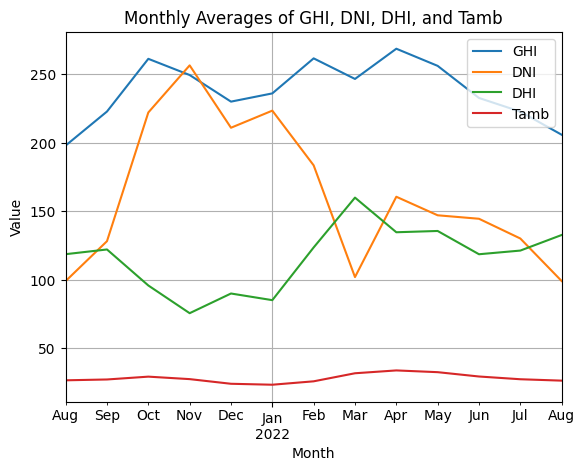

<Figure size 1200x600 with 0 Axes>

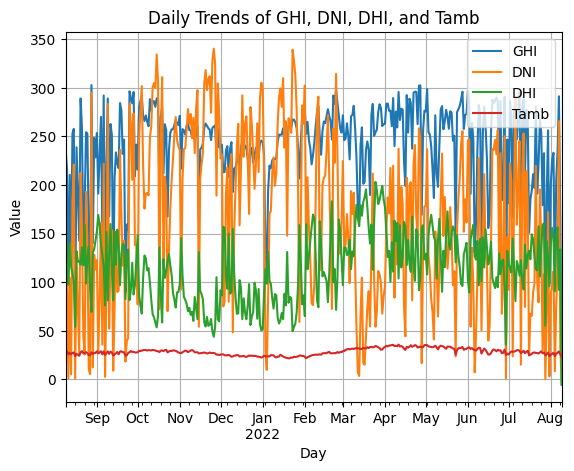

<Figure size 800x500 with 0 Axes>

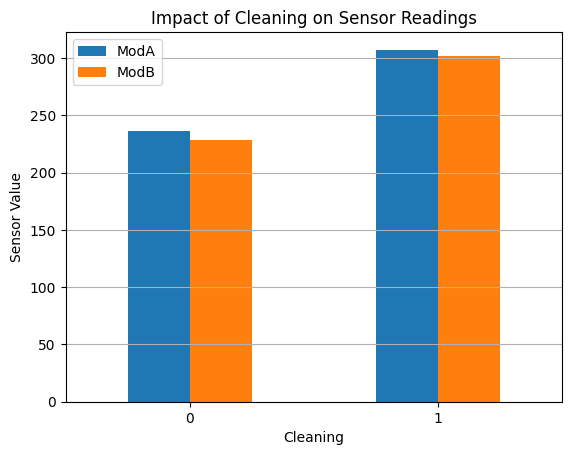

<Figure size 1200x600 with 0 Axes>

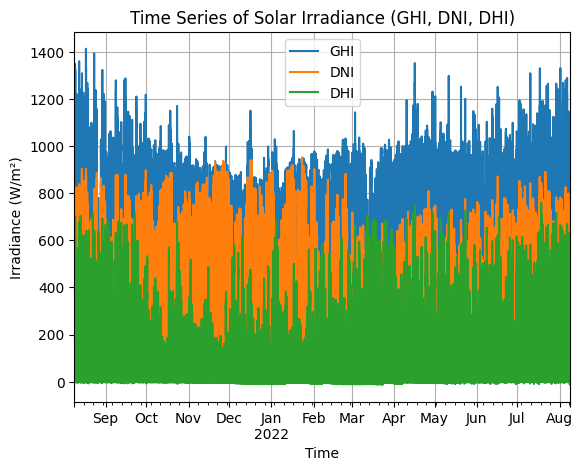

<Figure size 1200x600 with 0 Axes>

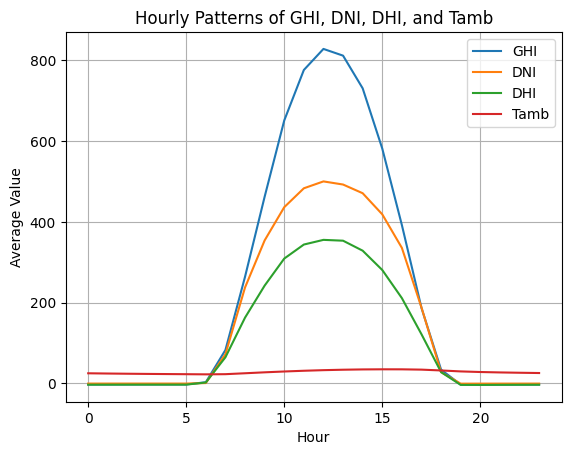

: 

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set Timestamp as index for time-series analysis
data.set_index('Timestamp', inplace=True)
# Resample data to monthly averages for GHI, DNI, DHI, and Tamb
monthly_data = data[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()

# Plot monthly trends
plt.figure(figsize=(12, 6))
monthly_data.plot(title='Monthly Averages of GHI, DNI, DHI, and Tamb', ylabel='Value', xlabel='Month')
plt.grid()
plt.show()
# Resample data to daily averages
daily_data = data[['GHI', 'DNI', 'DHI', 'Tamb']].resample('D').mean()

# Plot daily trends
plt.figure(figsize=(12, 6))
daily_data.plot(title='Daily Trends of GHI, DNI, DHI, and Tamb', ylabel='Value', xlabel='Day')
plt.grid()
plt.show()
# Group by 'Cleaning' status
cleaning_effect = data.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Bar plot of the effect of cleaning
plt.figure(figsize=(8, 5))
cleaning_effect.plot(kind='bar', title='Impact of Cleaning on Sensor Readings', ylabel='Sensor Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
# Plot time-series data for GHI, DNI, and DHI
plt.figure(figsize=(12, 6))
data[['GHI', 'DNI', 'DHI']].plot(title='Time Series of Solar Irradiance (GHI, DNI, DHI)', ylabel='Irradiance (W/m²)', xlabel='Time')
plt.grid()
plt.show()
# Extract hour from Timestamp
data['Hour'] = data.index.hour

# Calculate hourly averages
hourly_data = data.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Line plot for hourly patterns
plt.figure(figsize=(12, 6))
hourly_data.plot(title='Hourly Patterns of GHI, DNI, DHI, and Tamb', ylabel='Average Value', xlabel='Hour')
plt.grid()
plt.show()


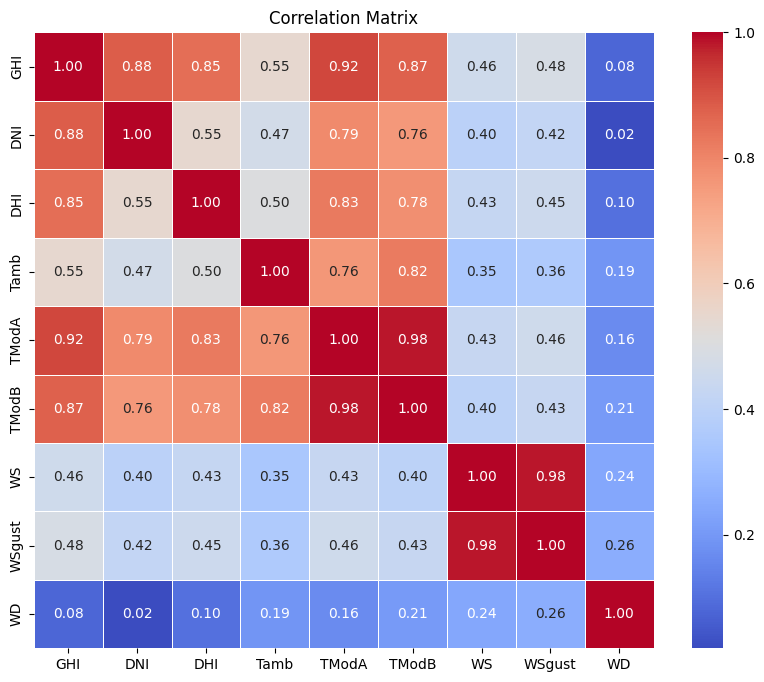

In [ ]:
variables = ['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']

# Compute correlation matrix
correlation_matrix = data[variables].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
# Pair plot for solar radiation and temperature variables
solar_temp_vars = ['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB']

sns.pairplot(data[solar_temp_vars], kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Solar Radiation and Temperature', y=1.02)
plt.show()
# Scatter plot matrix for wind and solar irradiance variables
wind_solar_vars = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']

sns.pairplot(data[wind_solar_vars], kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Scatter Matrix of Wind Conditions and Solar Irradiance', y=1.02)
plt.show()


                  WS             WD
count  525600.000000  525600.000000
mean        2.121113     153.435172
std         1.603466     102.332842
min         0.000000       0.000000
25%         1.000000      59.000000
50%         1.900000     181.000000
75%         3.100000     235.100000
max        19.500000     360.000000


<Figure size 800x800 with 0 Axes>

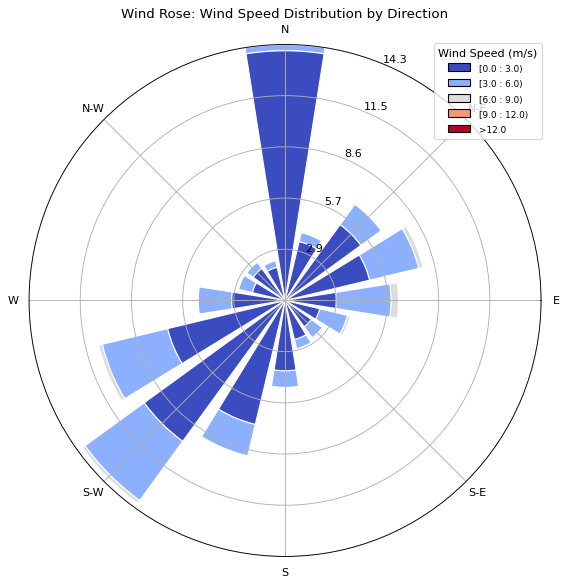

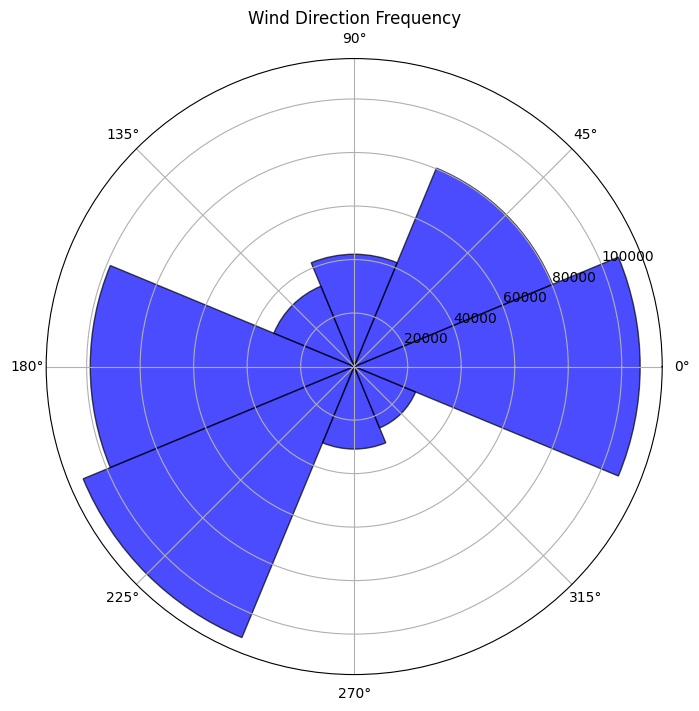

In [ ]:
from matplotlib import cm  # For colormap objects

# Drop rows with missing wind data
wind_data = data[['WS', 'WD']].dropna()

# Check basic statistics
print(wind_data.describe())

# Windrose plot
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(
    wind_data['WD'], 
    wind_data['WS'], 
    normed=True,  # Replacing 'density' with 'normed'
    opening=0.8, 
    edgecolor='white', 
    bins=np.arange(0, 15, 3), 
    cmap=cm.coolwarm  # Fixed colormap usage
)
ax.set_title('Wind Rose: Wind Speed Distribution by Direction')
ax.set_legend(title='Wind Speed (m/s)', loc='best')
plt.show()

# Binned wind direction
wind_data['WD_bin'] = pd.cut(wind_data['WD'], bins=np.arange(0, 361, 45), right=False)
wind_dir_counts = wind_data['WD_bin'].value_counts().sort_index()

# Create radial bar plot
angles = np.deg2rad(np.arange(0, 360, 45))  # Convert degrees to radians
values = wind_dir_counts.values

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
ax.bar(angles, values, width=np.pi/4, color='blue', alpha=0.7, edgecolor='black')
ax.set_title('Wind Direction Frequency')
plt.show()

RH      0
Tamb    0
GHI     0
DNI     0
DHI     0
dtype: int64


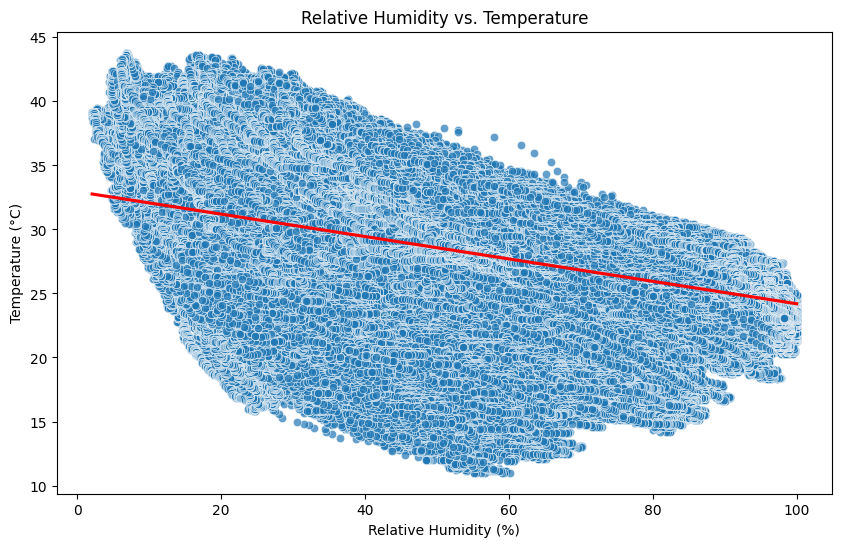

In [ ]:
print(data[['RH', 'Tamb', 'GHI', 'DNI', 'DHI']].isnull().sum())

# Drop or fill missing values if necessary
data.dropna(subset=['RH', 'Tamb', 'GHI', 'DNI', 'DHI'], inplace=True)
# Scatter plot: RH vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='RH', y='Tamb', alpha=0.7)
sns.regplot(data=data, x='RH', y='Tamb', scatter=False, color='red')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()


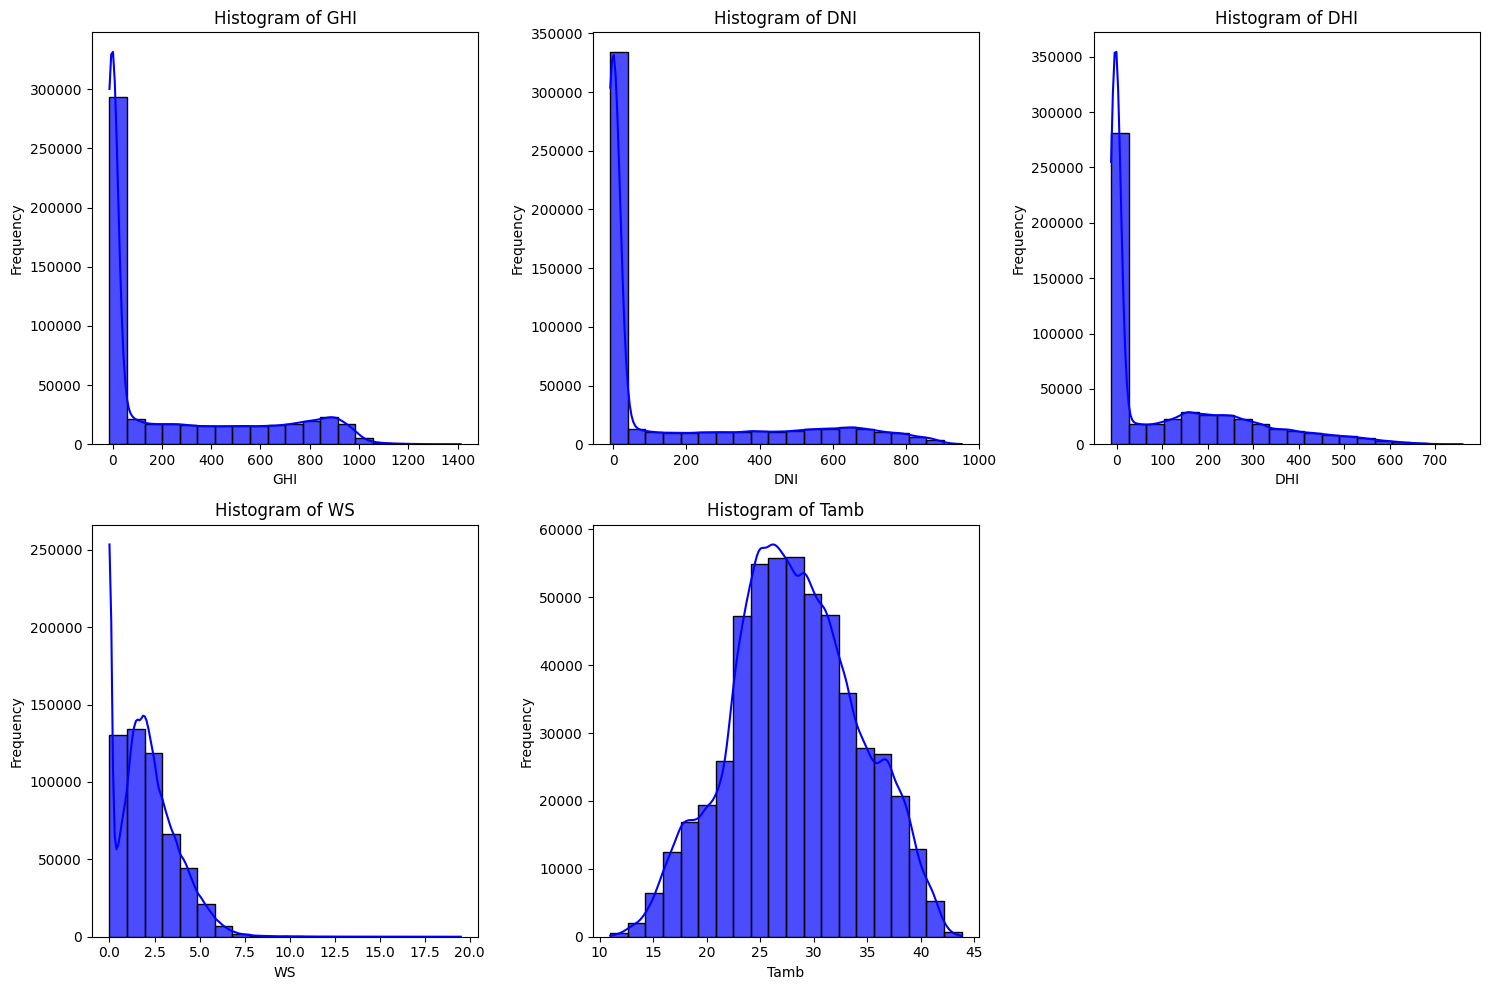

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data (if not already loaded)
# data = pd.read_csv('your_dataset.csv')  # Uncomment and replace with your dataset file

data = pd.read_csv(r"D:\EAD\data\benin-malanville.csv")
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']  # Replace with actual column names

# Filter valid variables
valid_variables = [var for var in variables if var in data.columns]

# Ensure there are variables to plot
if not valid_variables:
    print("No valid variables found in the dataset.")
else:
    plt.figure(figsize=(15, 10))

    # Plot histograms
    for i, var in enumerate(valid_variables, 1):
        plt.subplot(2, 3, i)
        sns.histplot(data[var], bins=20, kde=True, color='blue', alpha=0.7)
        plt.title(f'Histogram of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
data = pd.read_csv(r"D:\EAD\data\benin-malanville.csv")
z_scores = (data - data.mean()) / data.std()

# Identify outliers (flagging points with |Z| > 3)
outliers = z_scores[(z_scores.abs() > 3).any(axis=1)]

# Display first few Z-scores
print("Z-Scores of the dataset:")
print(z_scores.head())

# Display flagged outliers
print("\nFlagged outliers:")
print(outliers)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv(r"D:\EAD\data\benin-malanville.csv") 
print(data.head())  

# Set up the variables for visualization
x_var = 'GHI'         
y_var = 'Tamb'        
size_var = 'RH'       
color_var = 'WS'    

# Remove any NaN values that could interfere with visualization
data.dropna(subset=[x_var, y_var, size_var, color_var], inplace=True)

# Create the bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(
    x=data[x_var],
    y=data[y_var],
    s=data[size_var] * 10,  # Scale bubble sizes
    c=data[color_var],
    alpha=0.6,
    cmap='viridis',  # Choose colormap
)

# Add labels and legends
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title(f'Bubble Chart: {x_var} vs {y_var} vs {color_var} with {size_var} as bubble size')
plt.colorbar(label=color_var)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv(r"D:\EAD\data\benin-malanville.csv")

# Display initial information
print("Initial Data Information:")
print(data.info())

# Display the first few rows to observe the structure
print("\nInitial Data Sample:")
print(data.head())

# Step 1: Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle entirely null columns like 'Comments'
if 'Comments' in data.columns and data['Comments'].isnull().all():
    print("\nDropping 'Comments' column as it is entirely null.")
    data.drop(columns=['Comments'], inplace=True)

# Alternatively, handle missing data in specific columns by replacing null values
# Replace missing numerical data with 0, or categorical data with 'Unknown'
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == 'object':  # If it's categorical, fill with 'Unknown'
            data[col].fillna('Unknown', inplace=True)
        else:  # For numerical columns, fill with 0
            data[col].fillna(0, inplace=True)

# Confirm changes after handling missing values
print("\nMissing Values After Handling:")
print(data.isnull().sum())

# Step 2: Handle anomalies/outliers
# Let's say 'WS' (wind speed) shouldn't logically have negative values
# Replace these values with NaN and drop them or set them to a logical range
data['WS'] = data['WS'].apply(lambda x: x if x >= 0 else None)

# Optionally drop rows with anomalies
data.dropna(subset=['WS'], inplace=True)

# Step 3: Validate types if necessary
# Example: Convert 'date' to datetime if there is a date column
# data['date'] = pd.to_datetime(data['date'])

# Final confirmation
print("\nData after cleaning:")
print(data.head())
